In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, GridSearchCV

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
survival_rate = round(train['Survived'].sum()/len(train),4)
print(survival_rate)

0.3838


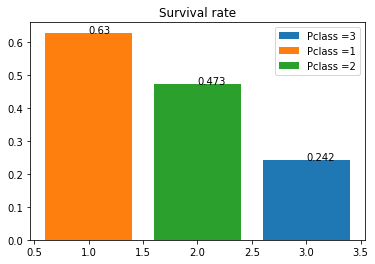

In [7]:
x = train['Pclass'].unique()
for i in x:
    y = train[train['Pclass'] == i]['Survived'].sum() / len(train[train['Pclass']==i])
    plt.bar(i, y, label = 'Pclass =' + str(i))
    plt.annotate(str(round(y,3)), xy= (i,y))
plt.title('Survival rate')
plt.legend()
plt.show()

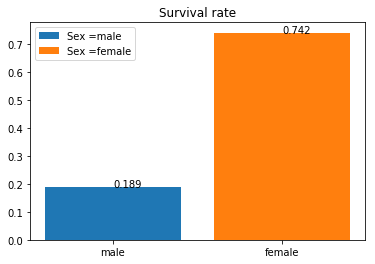

In [8]:
x = train['Sex'].unique()
for i in x:
    y = train[train['Sex'] == i]['Survived'].sum() / len(train[train['Sex']==i])
    plt.bar(i, y, label = 'Sex =' + str(i))
    plt.annotate(str(round(y,3)), xy= (i,y))
plt.title('Survival rate')
plt.legend()
plt.show()

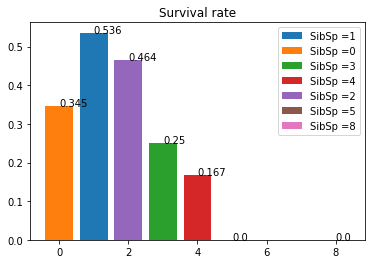

In [9]:
x = train['SibSp'].unique()
for i in x:
    y = train[train['SibSp'] == i]['Survived'].sum() / len(train[train['SibSp']==i])
    plt.bar(i, y, label = 'SibSp =' + str(i))
    plt.annotate(str(round(y,3)), xy= (i,y))
plt.title('Survival rate')
plt.legend()
plt.show()

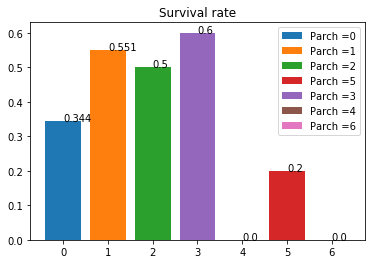

In [10]:
x = train['Parch'].unique()
for i in x:
    y = train[train['Parch'] == i]['Survived'].sum() / len(train[train['Parch']==i])
    plt.bar(i, y, label = 'Parch =' + str(i))
    plt.annotate(str(round(y,3)), xy= (i,y))
plt.title('Survival rate')
plt.legend()
plt.show()

In [11]:
grouped_pclass = train.groupby('Pclass')['Fare']
for p, group in grouped_pclass:
    print('pclass=',p)
    print(group.describe())

pclass= 1
count    216.000000
mean      84.154687
std       78.380373
min        0.000000
25%       30.923950
50%       60.287500
75%       93.500000
max      512.329200
Name: Fare, dtype: float64
pclass= 2
count    184.000000
mean      20.662183
std       13.417399
min        0.000000
25%       13.000000
50%       14.250000
75%       26.000000
max       73.500000
Name: Fare, dtype: float64
pclass= 3
count    491.000000
mean      13.675550
std       11.778142
min        0.000000
25%        7.750000
50%        8.050000
75%       15.500000
max       69.550000
Name: Fare, dtype: float64


In [12]:
test.loc[(test['Fare'].isnull()),'Fare'] = test['Fare'].mean()
print(train.isnull().sum(), test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [13]:
del train['Cabin']
del test['Cabin']

In [14]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

c:\users\tjrdn\miniconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\tjrdn\miniconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


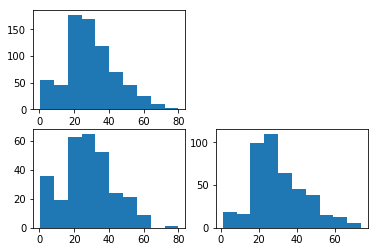

In [15]:
figure = plt.figure()
ax1 = figure.add_subplot(2,2,1)
ax2 = figure.add_subplot(2,2,3)
ax3 = figure.add_subplot(2,2,4)
ax1.hist(train['Age'])
ax2.hist(train[train['Survived']==1]['Age'])
ax3.hist(train[train['Survived']==0]['Age'])
plt.show()

In [16]:
data = [train, test]
for d in data:
    d['N'] = d['Name'].str.split('.',expand=True)[0].str.split(',',expand=True)[1].str.strip(' ')
   
print(train['N'].value_counts(),test['N'].value_counts())
for d in data:
    d['N'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','the Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                                ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr','Mrs'],inplace=True)
print(train.groupby('N')['Age'].mean(), test.groupby('N')['Age'].mean())

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Lady              1
the Countess      1
Capt              1
Sir               1
Don               1
Jonkheer          1
Ms                1
Mme               1
Name: N, dtype: int64 Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Ms          1
Dona        1
Name: N, dtype: int64
N
Master     4.574167
Miss      21.860000
Mr        33.022727
Mrs       35.981818
Name: Age, dtype: float64 N
Master     7.406471
Miss      21.774844
Mr        32.340426
Mrs       38.904762
Name: Age, dtype: float64


In [17]:
nlist = ['Mr','Miss','Mrs','Master']
alist = [33, 22, 36, 5]
blist = [32, 32, 39, 7]
for name, a, b in zip(nlist, alist, blist):
    train.loc[(train['Age'].isnull())&(train['N']== name),'Age'] = a
    test.loc[(test['Age'].isnull())&(test['N']== name),'Age'] = b
print(train.isnull().sum(), test.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
N              0
dtype: int64 PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
N              0
dtype: int64


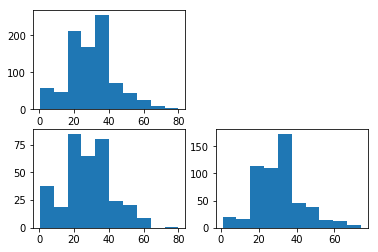

In [18]:
figure = plt.figure()
ax1 = figure.add_subplot(2,2,1)
ax2 = figure.add_subplot(2,2,3)
ax3 = figure.add_subplot(2,2,4)
ax1.hist(train['Age'])
ax2.hist(train[train['Survived']==1]['Age'])
ax3.hist(train[train['Survived']==0]['Age'])
plt.show()

c:\users\tjrdn\miniconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in longlong_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


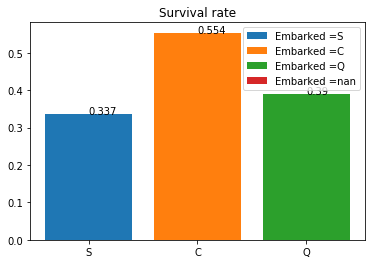

In [19]:
x = train['Embarked'].unique()
for i in x:
    y = train[train['Embarked'] == i]['Survived'].sum() / len(train[train['Embarked']==i])
    plt.bar(i, y, label = 'Embarked =' + str(i))
    plt.annotate(str(round(y,3)), xy= (i,y))
plt.title('Survival rate')
plt.legend()
plt.show()

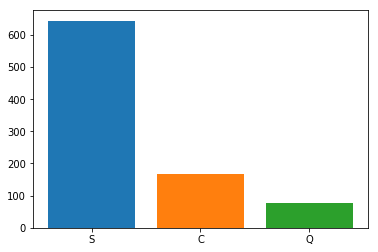

In [20]:
x = train['Embarked'].unique()
for i in x:
    y = len(train[train['Embarked']==i])
    plt.bar(i, y)
plt.show()

In [21]:
train.loc[(train['Embarked'].isnull()), 'Embarked'] = 'S'
print(train.isnull().sum(), test.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
N              0
dtype: int64 PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
N              0
dtype: int64


In [22]:
columnlist = ['Sex','N','Embarked']

for column in columnlist:
    le = preprocessing.LabelEncoder()
    le.fit(train[column])
    train[column] = le.transform(train[column])
    del le
    
for column in columnlist:
    le = preprocessing.LabelEncoder()
    le.fit(test[column])
    test[column] = le.transform(test[column])
    del le

In [23]:
columnlist = ['Age', 'Fare']
ms = preprocessing.MinMaxScaler(feature_range=[0,1])
ms.fit(train[columnlist])
train[columnlist]=ms.transform(train[columnlist])
del ms
ms = preprocessing.MinMaxScaler(feature_range=[0,1])
ms.fit(test[columnlist])
test[columnlist]=ms.transform(test[columnlist])
del ms

In [24]:
del train['Name']
del test['Name']
del train['Ticket']
del test['Ticket']
PI_train = train['PassengerId']
PI_test = test['PassengerId']
del train['PassengerId']
del test['PassengerId']

In [25]:
train_label = train['Survived']
del train['Survived']

In [26]:
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,N
0,3,1,0.271174,1,0,0.014151,2,2
1,1,0,0.472229,1,0,0.139136,0,3
2,3,0,0.321438,0,0,0.015469,2,1
3,1,0,0.434531,1,0,0.103644,2,3
4,3,1,0.434531,0,0,0.015713,2,2


In [27]:
train_label

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [28]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,N
0,3,1,0.452723,0,0,0.015282,1,2
1,3,0,0.617566,1,0,0.013663,2,3
2,2,1,0.815377,0,0,0.018909,1,2
3,3,1,0.353818,0,0,0.016908,2,2
4,3,0,0.287881,1,1,0.023984,2,3


In [29]:
k_fold = KFold(n_splits=10, shuffle=True, random_state = 0)

In [30]:
RFC = RandomForestClassifier()
rf_param_grid = {"max_depth": [None],
              "max_features": [3, 8, 8],
              "min_samples_split": [2, 3, 8],
              "min_samples_leaf": [1, 3, 8],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]
                }

gsRFC = GridSearchCV(RFC, rf_param_grid, cv=k_fold, scoring="accuracy",  verbose = 1)
gsRFC.fit(train,train_label)
RFC_best = gsRFC.best_estimator_

gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  2.9min finished


0.8406285072951739

In [31]:
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=k_fold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsGBC.fit(train,train_label)
GBC_best = gsGBC.best_estimator_

gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 338 tasks      | elapsed:   13.1s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   22.9s finished


0.8305274971941639

In [32]:
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=k_fold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsSVMC.fit(train,train_label)
SVMC_best = gsSVMC.best_estimator_

gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   15.2s finished


0.8338945005611672

In [33]:
XGBC = XGBClassifier()
xgb_param_grid = {'max_depth':[3,5,7],
                  'min_child_weight':[3,5,6],
                  'gamma': [ 0, 0.001, 0.01, 0.1, 1],
                  'learning_rate':[0.1, 0.05, 0.01]}

gsXGBC = GridSearchCV(XGBC,param_grid = xgb_param_grid, cv=k_fold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsXGBC.fit(train,train_label)
XGBC_best = gsXGBC.best_estimator_

gsXGBC.best_score_

Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    7.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   16.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   28.4s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:   44.7s
[Parallel(n_jobs=4)]: Done 1350 out of 1350 | elapsed:   50.0s finished


0.8395061728395061

In [34]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), 
('svc', SVMC_best),('gbc',GBC_best), ('xgb', XGBC_best)], voting='hard', n_jobs=4)

votingC = votingC.fit(train, train_label)

In [37]:
prediction = votingC.predict(test)
prediction.shape

(418,)

In [38]:
submission = pd.DataFrame({"PassengerId" : PI_test,
                          "Survived" : prediction
                          })
submission.to_csv('submission.csv',  index = False)

In [44]:
import sklearn.metrics as metrics

y = pd.read_csv('./gender_submission.csv')
y = y.merge(submission, on = 'PassengerId')
p = np.array(y['Survived_y'])
y = np.array(y['Survived_x'])

In [48]:
accuracy = np.mean(np.equal(y,p))
right = np.sum(y * p ==1)
precision = right/np.sum(p)
recall = right / np.sum(y)
f1 = 2 * precision * recall / (precision + recall)

In [50]:
print(accuracy, precision, recall, f1)

0.8779904306220095 0.8581560283687943 0.7960526315789473 0.825938566552901
